我是对泰坦尼克号数据集进行探索，探索的问题：有哪些因素会让船上的人生还率更高。
而我个人觉得：
* 1、男性的生还率应该更高，
* 2、年轻人（20~30岁）生还率更高
* 3、不同的船舱生还率也不同

### 1、我们读取数据集里面的数据，并清洗数据

In [316]:
#coding: utf-8
import pandas as pd
from scipy.stats import mode

titannic_data = pd.read_csv('./titanic-data.csv')

In [317]:
titannic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


从上面可知道，总数据条数为**891**条，而Age只有**714**条不为空，Cabin只有204条不为空。由于**Age是我们探索数据集很重要的数据**，所以需要对它做处理。

因为**Age缺失的数据量比较多**，我们准备**使用众数填充**的方法，因为是缺失的值是它们的可能性比较大。

In [318]:
# 计算出众数
mode_value = mode(titannic_data['Age']).mode[0]

# 年龄填充众数
titannic_data['Age'].fillna(mode_value, inplace=True)
titannic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


从上可知道，经过我们的清洗，**Age的数据全部都不为空**了。

### 2、按照性别分组，计算下男性和女性生还率人数

In [319]:
%pylab inline
def num_for_column(column):
    return len(column)

# 按照性别分组
data_by_sex = titannic_data.groupby('Sex')

Populating the interactive namespace from numpy and matplotlib


男性与女性人数：
Sex
female    314
male      577
Name: PassengerId, dtype: int64


<function matplotlib.pyplot.show>

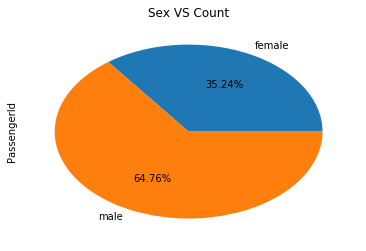

In [320]:
# 查看分别对应的人数
print "男性与女性人数："
print data_by_sex['PassengerId'].count()
# 查看性别占比图
data_by_sex['PassengerId'].count().plot(kind='pie', autopct='%.2f%%')
plt.title('Sex VS Count')
plt.show

男性生还人数：109，生还率：18.89%；女性生还人数：233，生还率：74.20%


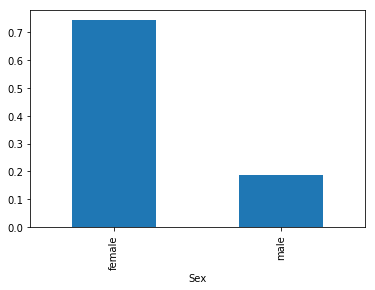

In [321]:
survived_data_by_sex = data_by_sex['Survived'].sum()
total_data_by_sex = data_by_sex['Survived'].apply(num_for_column)
scale_data = survived_data_by_sex / total_data_by_sex
print "男性生还人数：{:.0f}，生还率：{:.2%}；女性生还人数：{:.0f}，生还率：{:.2%}".format(survived_data_by_sex['male'], scale_data['male'], survived_data_by_sex['female'], scale_data['female'])
scale_data.plot(kind='bar')

**结论：**上面的数据显示，男性人数为577，生还人数为109，生还率只有18.89%；而女性人数为314，生还人数为233，生还率却为74.20%。男性人数更多，但生还人数却更少，可以得出**女性生还率比男性高**。

### 3、按照年龄分组，使用柱状图查看下，生还率高的集中在哪个年龄阶段

首先删除年龄异常数据的乘客（小于等于0或大于等于200岁的人为异常数据）

In [322]:
%pylab inline
import matplotlib.pyplot as plt

def is_normal_age(age):
    if age > 0 and age < 200:
        return True
    return False

normal_age_data = titannic_data[titannic_data['Age'].apply(is_normal_age)]

Populating the interactive namespace from numpy and matplotlib


然后，将数据按照按照年龄段进行分组，生成对应年龄段的饼状图和柱状图

In [323]:
def add_range_age(data):
    age = data['Age']
    range_age = ''
    if age <= 10:
        range_age = '0~10'
    elif age <= 20:
        range_age = '10~20'
    elif age <= 30:
        range_age = '20~30'
    elif age <= 40:
        range_age = '30~40'
    elif age <= 50:
        range_age = '40~50'
    elif age <= 60:
        range_age = '50~60'
    elif age <= 70:
        range_age = '60~70'
    elif age <= 80:
        range_age = '70~80'
    elif age <= 90:
        range_age = '80~90'
    elif age <= 100:
        range_age = '90~100'
    else:
        range_age = '100+'
    data['Range_age'] = range_age
    del data['Age']
    return data

filter_data = normal_age_data[['Age', 'Survived']]
filter_data = filter_data.apply(add_range_age, axis='columns')

grouped_data = filter_data.groupby('Range_age', as_index=True)
sum_data = grouped_data.sum()['Survived']
total_data = grouped_data.apply(num_for_column)

之后，查看年龄段总人数及所占比例

Range_age
0~10      64
10~20    115
20~30    407
30~40    155
40~50     86
50~60     42
60~70     17
70~80      5
dtype: int64


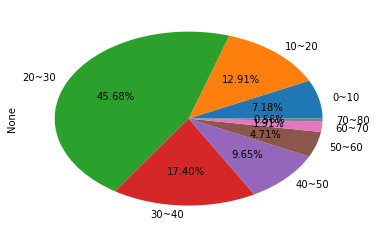

In [324]:
print total_data
total_data.plot(kind='pie', autopct='%.2f%%')

从上可知：
* 0~10岁人数为64人，占比7.18%
* 10~20岁人数为115人，占比12.91%
* 20~30岁人数为407，占比45.68%
* 30~40岁人数为155，占比17.40%
* 40~50岁人数为86，占比4.71%
* 50~60岁人数为42，占比4.71%
* 60~70岁人数为17，占比1.91%
* 70~80岁人数为5，占比0.56%

再查看各个年龄段生还人数，及所占比例

Range_age
0~10      38.0
10~20     44.0
20~30    136.0
30~40     69.0
40~50     33.0
50~60     17.0
60~70      4.0
70~80      1.0
Name: Survived, dtype: float64


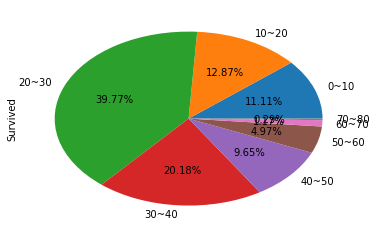

In [325]:
print sum_data

sum_data.plot(kind='pie', autopct='%.2f%%')

从上可知：
* 0~10岁人数为38，占比11.11%
* 10~20岁人数为44，占比12.87%
* 20~30岁人数为136，占比39.77%
* 30~40岁人数为69，占比20.18%
* 40~50岁人数为33，占比9.65%
* 50~60岁人数为17，占比4.97%
* 60~70岁人数为4，占比1.17%
* 70~80岁人数为1，占比0.29%

最后，计算各个年龄段的生还率

Range_age
0~10     0.593750
10~20    0.382609
20~30    0.334152
30~40    0.445161
40~50    0.383721
50~60    0.404762
60~70    0.235294
70~80    0.200000
dtype: float64


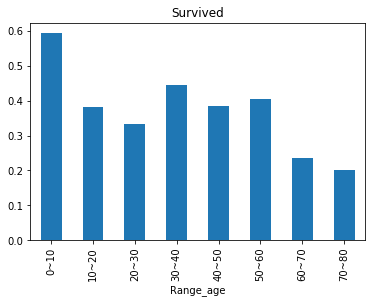

In [326]:
result_data = sum_data / total_data
print result_data

result_data.plot(kind='bar', title='Survived')

**结论：**从上面可知，0~10年龄段的人共有64人，生还38人，生还率为59.38%，可比较出**年龄段处于0~10的生还率最高**。

### 4、按照船舱等级分组，进行数据分析

先选出数据

In [327]:
filter_data = titannic_data[['Pclass', 'Survived', 'PassengerId']]

然后以Pclass分组，并且用饼状图显示对应的船舱人数所占比例

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


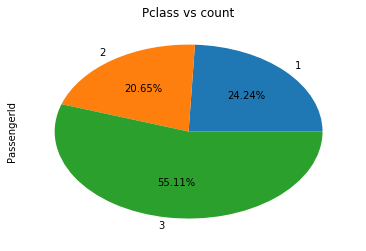

In [328]:
grouped_data_by_class = filter_data.groupby('Pclass')
print grouped_data_by_class['PassengerId'].count()

grouped_data_by_class['PassengerId'].count().plot(kind='pie', autopct='%.2f%%')
plt.title('Pclass vs count')
plt.show()

从上可知：
* 头等舱人数为216，占比24.24%
* 二等舱人数为184，占比20.65%
* 普通舱人数为491，占比55.11%

生还人数：
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64


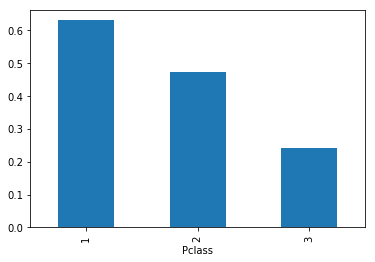

In [329]:
sum2_data = grouped_data_by_class.sum()['Survived']
total_data = grouped_data_by_class.apply(num_for_column)

print "生还人数："
print sum2_data

result_data = sum2_data / total_data

print result_data
result_data.plot(kind='bar')

**结论：**头等舱的总人数为216，生还人数为136，生还率为62.96%；二等舱总人数为184，生还人数为87，生还率为47.28%；普通舱总人数为491，生还人数为119，的生还率为24.24%，**头等舱生还率最高**

## 最后

**结论：**
影响生还率的因素为性别、年龄和船舱等级，从当前数据集分析出，**女性、儿童、头等舱的生还率较高**。

不过，也存在一些因素会导致我们的数据分析结果不准确，这些因素有：
* 从百度百科查询知道，泰坦尼克号船上总人数为2208人，而我们这里数据有891条，样本量已经够大，能够代表整体人口，会有一定的偏差。
* 年龄数据缺失了177条，我们使用众数填充，会带入偏差和不确定性
* 影响生还的因素还有求生艇数量、职业

查看了网络上的信息所知，当泰坦尼克号要沉没时，首先让儿童和妇女离开，这就导致女性和儿童的生还率比较高；另外一方面，头等舱和二等舱中的救生艇比较多，所以在头等舱和二等舱的生还率更高。